In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib

import pandas as pd
import scipy.io
import numpy as np
import seaborn

In [2]:
df = pd.read_csv('neuron_post_processing_fixed.csv')
df.head()

,neuron,time,mean,std,sum,0,1,2,3,4,...,11,12,13,14,15,16,17,18,19,20
0,0,0,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0.047619,0.218218,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,2,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Add coordinates

In [3]:
coordinates = scipy.io.loadmat('data/RF_pos_exp1')

In [4]:
df_coordinates = pd.DataFrame(coordinates['xyposexp1']).rename({0:'x', 1:'y'}, axis='columns')
df_coordinates['neuron'] = df_coordinates.index
df_coordinates[['neuron','x','y']].head()

,neuron,x,y
0,0,25.125694,31.268716
1,1,25.319985,16.599247
2,2,27.395892,15.984191
3,3,26.179770,16.742830
4,4,14.746350,28.460502


In [5]:
df_data = pd.merge(df, df_coordinates, how='inner', on='neuron').fillna(0)
df_data.head()

,neuron,time,mean,std,sum,0,1,2,3,4,...,13,14,15,16,17,18,19,20,x,y
0,0,0,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25.125694,31.268716
1,0,1,0.047619,0.218218,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,25.125694,31.268716
2,0,2,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25.125694,31.268716
3,0,3,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25.125694,31.268716
4,0,4,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25.125694,31.268716


In [6]:
df_data['mean'].max()

0.4761904761904762

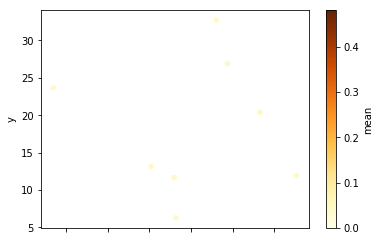

In [7]:
df_time_plot = df_data.loc[df['time'] == 0]
df_time_plot = df_time_plot.loc[df_time_plot['mean'] != 0 ]
plot = df_time_plot.plot(x='x',
                         y='y', 
                         kind='scatter',
                         c='mean',
                         vmin=0,
                         vmax=0.48,
                         colormap='YlOrBr')

## Animation

In [8]:
color_data = df_data[['time','mean']].groupby('time')['mean'].apply(np.array).tolist()

df_data['size'] = df_data['mean'] * 100
size_data = df_data[['time','size']].groupby('time')['size'].apply(np.array).tolist()

In [9]:
def update_plot(i, data, size_data, scat):
    scat.set_array(data[i])
    scat.set_clim(vmin=0, vmax=0.48)
    scat.set_sizes(size_data[i])
    return scat,

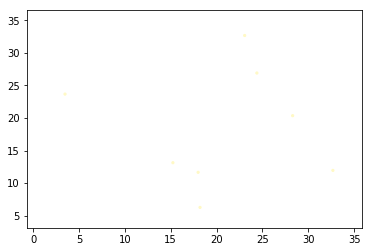

In [10]:
numframes = 1000
x, y, c = df_coordinates['x'], df_coordinates['y'], df_data.loc[df_data['time'] == 0]['mean']

fig = plt.figure()
scat = plt.scatter(x, y, c=c, s=50, cmap=plt.cm.YlOrBr, alpha=1)

ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes), interval=1,
                                  fargs=(color_data, size_data, scat))
plt.show()

In [11]:
%%time
ani.save('basic_animation.mp4', fps=60, extra_args=['-vcodec', 'libx264'])

CPU times: user 1min 18s, sys: 1min 5s, total: 2min 23s
Wall time: 51.2 s
